In [320]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None # to display all columns 
pd.options.display.max_rows = None # to display all rows

In [321]:
plt.style.use("seaborn-whitegrid")
sns.set(style="whitegrid")

 <br><br>
 
 # 1. Data Sourcing 

In [322]:
df =pd.read_csv('loan.csv')
# Display first 5 lines of data
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## Data Understanding

In [323]:
print(df.shape) # check total no of rows and columns 

# Check Null values
df.isnull().sum()

(39717, 111)


id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [324]:
print(df.info())
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object


In [327]:
# Read Columsn Description from Data Dictionlary
description = pd.read_excel('Data_Dictionary.xlsx')
description.drop(description.columns.difference(['LoanStatNew','Description']), 1, inplace=True)
description.style.set_properties(subset=['Description'], **{'width' :'850px'})


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


 <br> <br> <br> <br>
# 2.1 Data Cleaning - Fixing Columns

In [328]:
# above count shows many columns have null values , let's find out percentage of null values in these columns 
# and then we can decide if we can drop them or not. 

df.isnull().sum()/len(df) * 100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [330]:
## Drop columns having null values above 30%
not_required_column = df.columns[round(df.isnull().sum()/len(df) * 100) > 30]
print(not_required_column)

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [331]:
df = df.drop(not_required_column, axis = 1)
print(df.shape)

(39717, 53)


In [332]:
# Check Null percentage again
df.isnull().sum()/len(df) * 100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

<br><br><br>
<br>

# 2.2 Data Cleaning - Filter Column

In [333]:
# Check Unique Value counts in each column
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

In [334]:
df[['initial_list_status','tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq','application_type',
    'policy_code']].head()

,initial_list_status,tax_liens,delinq_amnt,chargeoff_within_12_mths,acc_now_delinq,application_type,policy_code
0,f,0.0,0,0.0,0,INDIVIDUAL,1
1,f,0.0,0,0.0,0,INDIVIDUAL,1
2,f,0.0,0,0.0,0,INDIVIDUAL,1
3,f,0.0,0,0.0,0,INDIVIDUAL,1
4,f,0.0,0,0.0,0,INDIVIDUAL,1


#### Description of above columns
```
chargeoff_within_12_mths : Number of charge-offs within 12 months!
delinq_amnt              : The past-due amount owed for the accounts on which the borrower is now delinquent.
initial_list_status	     : The past-due amount owed for the accounts on which the borrower is now delinquent
acc_now_delinq	         : The past-due amount owed for the accounts on which the borrower is now delinquent.
```

In [335]:
# above columns doesn't make any sence in our Goal, so let's drop it.
df.drop(['initial_list_status','tax_liens','delinq_amnt','chargeoff_within_12_mths','acc_now_delinq',
         'application_type','policy_code'], axis =1 , inplace=True)

In [336]:
df.shape

(39717, 46)

In [337]:
# Now list all columns and identify which columns are not required 
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'pub_rec_bankruptcies'],
      dtype='object')

In [338]:
df.head(1)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.0,0.0,5863.155187,5833.84,5000.0,863.16,0.0,0.0,0.0,Jan-15,171.62,May-16,0.0,0.0


#### Analyse columns manually and drop columns which are  not required for our analysis
* id
* member_id
* funded_amnt_inv
* emp_title
* url
* title
* zip_code
* pymnt_plan
* delinq_2yrs ( 35405 records has zero value)
* dti
* delinq_2yrs
* inq_last_6mths
* earliest_cr_line
* inq_last_6mths
* pub_rec  ( 37601 zero records)
* revol_bal
* out_prncp
* out_prncp_inv
* total_pymnt
* total_pymnt_inv
* total_rec_prncp
* total_rec_int
* total_rec_late_fee
* recoveries
* collection_recovery_fee
* last_pymnt_d 
* last_pymnt_amnt
* last_credit_pull_d
* collections_12_mths_ex_med
* pub_rec_bankruptcies





In [339]:
df.drop(['id','member_id','funded_amnt_inv','emp_title','url','title','pymnt_plan','zip_code',
        'delinq_2yrs','dti','inq_last_6mths','earliest_cr_line','inq_last_6mths','pub_rec','revol_bal','out_prncp',
        'out_prncp_inv','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries',
        'collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med',
         'pub_rec_bankruptcies','total_pymnt'], axis = 1, inplace=True)

In [340]:
print(df.shape)
df.head()




(39717, 18)


,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,open_acc,revol_util,total_acc
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,3,83.70%,9
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,3,9.40%,4
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,2,98.50%,10
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,10,21%,37
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,15,53.90%,38


 <br> <br> <br> <br>

# 2.3 Data Cleaning - Missing Values
 


In [341]:
df.isnull().sum()

loan_amnt                 0
funded_amnt               0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
open_acc                  0
revol_util               50
total_acc                 0
dtype: int64

In [342]:
# Removes rows where revol_util is null (50 rows)
df=df[~(df['revol_util'].isnull())]
df.shape

(39667, 18)

In [343]:
# Removes rows where title is null (11 rows)
df=df[~(df['emp_length'].isnull())]
df.shape

(38595, 18)

In [344]:
df.isnull().sum()

loan_amnt              0
funded_amnt            0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
addr_state             0
open_acc               0
revol_util             0
total_acc              0
dtype: int64

In [345]:
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,open_acc,revol_util,total_acc
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,3,83.70%,9
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,3,9.40%,4
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,2,98.50%,10
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,10,21%,37
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,15,53.90%,38


<br><br><br><br>

# 2.4 Data Cleaning - Standardise Values


In [346]:
# remove percenatge(%) from int_rate column and revol_util column
df['int_rate'] = df['int_rate'].apply(lambda x: float(x[:-1]))
df['revol_util'] = df['revol_util'].apply(lambda x: float(x[:-1]))
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,open_acc,revol_util,total_acc
0,5000,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,3,83.7,9
1,2500,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,3,9.4,4
2,2400,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,2,98.5,10
3,10000,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,10,21.0,37
4,3000,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,15,53.9,38


<br><br><br><br>

# 2.4 Data Cleaning  - Split Column


In [347]:
df['issue_year']=pd.to_datetime(df['issue_d'], format = '%b-%y').dt.year

In [348]:
df['issue_month'] = pd.to_datetime(df['issue_d'], format = '%b-%y').dt.month
df.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,open_acc,revol_util,total_acc,issue_year,issue_month
0,5000,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,3,83.7,9,2011,12
1,2500,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,3,9.4,4,2011,12
2,2400,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,2,98.5,10,2011,12
3,10000,10000,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,10,21.0,37,2011,12
4,3000,3000,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,15,53.9,38,2011,12


<br><br><br><br>

# 2.5 Data Cleaning - Remove Rows

In [349]:
# home_ownership have None value in 3 places , let's drop all 3 rows 

In [350]:
df.home_ownership.value_counts()

RENT        18457
MORTGAGE    17203
OWN          2836
OTHER          96
NONE            3
Name: home_ownership, dtype: int64

In [351]:
df = df[~(df.home_ownership == "NONE")]

In [352]:
df.home_ownership.value_counts()

RENT        18457
MORTGAGE    17203
OWN          2836
OTHER          96
Name: home_ownership, dtype: int64

<br><br>
### Remove All Current Loan_status as this is not part of our analysis

In [353]:
df = df[~(df['loan_status'] == "Current")]

In [354]:
df.shape

(37494, 20)

In [355]:
df['loan_status'].value_counts()

Fully Paid     32110
Charged Off     5384
Name: loan_status, dtype: int64

<br><br>
# 2.6 Data Cleaning - Removing Outliers 

count     37116.000000
mean      65937.369662
std       35147.330160
min        4000.000000
25%       41000.000000
50%       59000.000000
75%       81746.500000
90%      112500.000000
95%      135000.000000
99%      189996.000000
max      234996.000000
Name: annual_inc, dtype: float64




[]

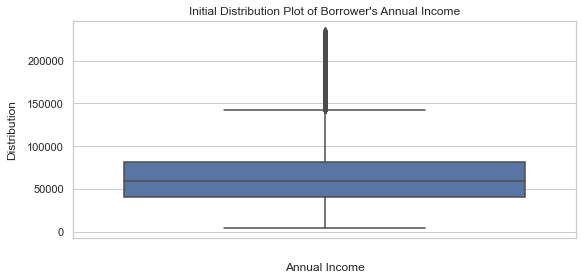

In [420]:
# Column = annual_inc

print(df.annual_inc.describe(percentiles=[.25,.50,.75,.90,.95,.99]))
print('\n')
plt.figure(figsize=(9, 4))
plt.title("Initial Distribution Plot")
sns.boxplot(y = 'annual_inc', data = df)
plt.xlabel('Annual Income', labelpad = 15)
plt.ylabel('Distribution', labelpad = 10)

plt.plot()

Quantile Value = 167000.0


count     36370.000000
mean      63358.312335
std       30384.624881
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       80000.000000
max      166361.000000
Name: annual_inc, dtype: float64




[]

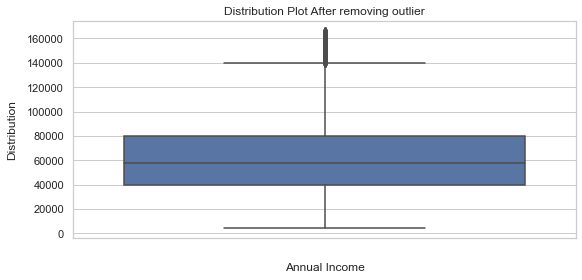

In [422]:
plt.figure(figsize=(9, 4))
qnt = df.annual_inc.quantile(0.99)

print('Quantile Value =', qnt)
print('\n')

df = df[df.annual_inc < qnt]

print(df.annual_inc.describe())
print('\n')

plt.title("Distribution Plot After removing outlier")
sns.boxplot(y = 'annual_inc', data = df)
plt.xlabel('Annual Income', labelpad = 15)
plt.ylabel('Distribution', labelpad = 10)

plt.plot()

In [465]:
df.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'open_acc', 'revol_util', 'total_acc', 'issue_year',
       'issue_month', 'funded_range', 'int_rate_percent_range',
       'annual_inc_rng', 'installment_rng', 'quarter'],
      dtype='object')

<br><br><br><br>

<h1 align="center" style="color:Red"><u> Univariate analysis </u> </h1>
<br><br>

* Categorical Variables
    * Unordered categorical - `home_ownership , verfication_status,loan_status,purpose, addr_state`
    
    <br>
    * Ordered categorical -  `term, grade, sub_grade, emp_length, issue_month, issue_year`  
    
    
* Quantitative variables - `funded_amnt, int_rate, installment,annual_inc,open_acc,revol_util` 
</br>



<br>

### 1.1 Univariate Analysis - Charged Off Loans


Charged Off Loan 5384
Fully Paid Loan 32110
% of loan getting charged off 14.359630874273217


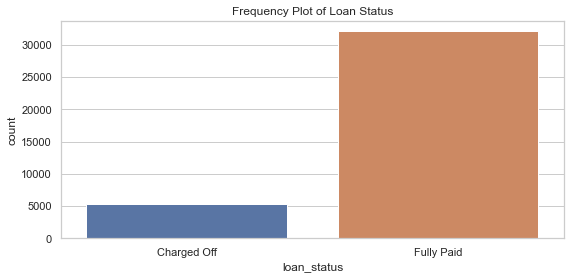

In [385]:
print('Charged Off Loan',df[df['loan_status'] == "Charged Off"]['loan_status'].count())
print('Fully Paid Loan',df[df['loan_status'] == "Fully Paid"]['loan_status'].count())

print("% of loan getting charged off", (df[df['loan_status'] == "Charged Off"]['loan_status'].count()/df['loan_status'].count() * 100))


plt.figure(figsize=(9, 4))
sns.countplot(x = 'loan_status',  
              order = df.loan_status.value_counts().sort_index().index, 
              data = df)
plt.title('Frequency Plot of Loan Status')


plt.show()


### <u> Analysis 1.1: </u>
<br>

<h6 style="color:blue"> 
    Initial analysis says that 14.35% loans are getting charged Off.
</h6>
<br><br>

<br>

### 1.2 Univariate Analysis - Charged Off Loans by Home Owership

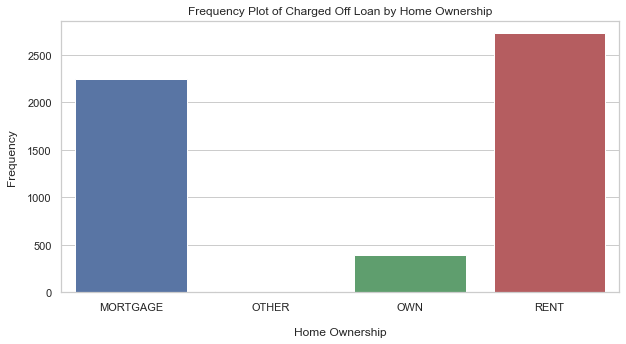

In [386]:
# Let's find No of Charged Off Loans by Home Owership
plt.figure(figsize=(10, 5))
Charged_Off_df = df[df['loan_status'] == "Charged Off"]
plt.title('Frequency Plot of Charged Off Loan by Home Ownership')
sns.countplot(x = 'home_ownership',  
              order = Charged_Off_df.home_ownership.value_counts().sort_index().index, 
              data = Charged_Off_df)
plt.xlabel('Home Ownership', labelpad = 15)
plt.ylabel('Frequency', labelpad = 10)


plt.show()


### <u> Analysis 1.2: </u>
<br>

<h6 style="color:blue"> 
    Initial analysis says that people who are living on rent or have mortgage have high chance to Charged Off.
</h6>
<br><br>

<br>

### 1.3 Univariate Analysis - Charged Off Loans by Loan Verification status


In [254]:
Charged_Off_df.verification_status.value_counts()

Not Verified       2042
Verified           1949
Source Verified    1393
Name: verification_status, dtype: int64

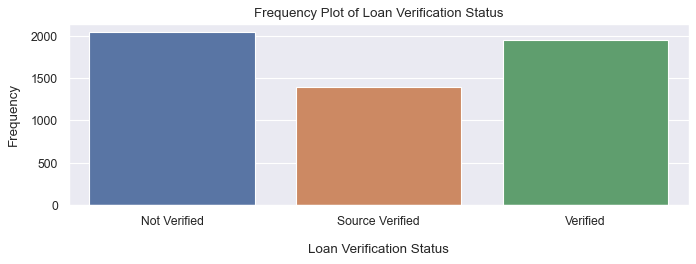

In [255]:
# Let's find No of Charged Off Loans by Home Owership
plt.figure(figsize=(10, 3), dpi=80)
plt.title('Frequency Plot of Loan Verification Status')
sns.countplot(x = 'verification_status',  
              order = Charged_Off_df.verification_status.value_counts().sort_index().index, 
              data = Charged_Off_df)
plt.xlabel('Loan Verification Status', labelpad = 15)
plt.ylabel('Frequency', labelpad = 10)

plt.subplots_adjust(wspace = 0.6)
plt.show()

### <u> Analysis 1.3: </u>
<br>

<h6 style="color:blue"> 
    Initial analysis says that loans which source are verified have less chance to be charged off.
</h6>
<br><br>

<br>

### 1.4 Univariate Analysis - Charged Off Loans by Loan Purpose

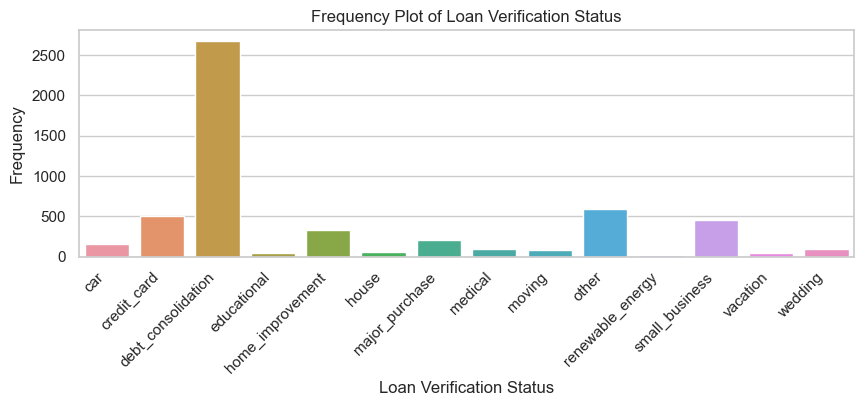

In [414]:
# Let's find No of Charged Off Loans by Purpose
plt.figure(figsize=(10, 3), dpi=100)
plt.title('Frequency Plot of Loan Verification Status')
sns.countplot(x = 'purpose',  
              order = Charged_Off_df.purpose.value_counts().sort_index().index, 
              data = Charged_Off_df)
plt.xlabel('Loan Verification Status')
plt.ylabel('Frequency', labelpad = 5)
plt.xticks(rotation = 45, ha = 'right') 
plt.show()

### <u> Analysis 1.4 : </u>
<br>
<h6 style="color:blue"> 
    Initial analysis says that loans which are given for debt_consolidation have high chance to Charged Off.
</h6>
<br><br>

<br>

### 1.5 Univariate Analysis - Charged Off Loans by State

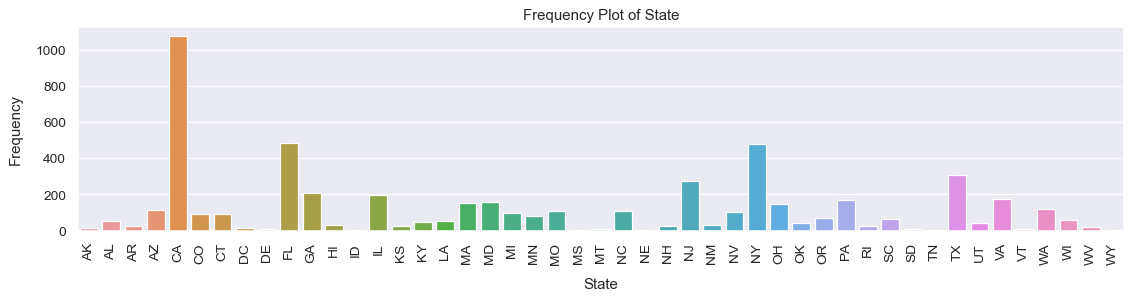

In [257]:
# Let's find No of Charged Off Loans by State
plt.figure(figsize=(15, 3), dpi=90)
plt.title('Frequency Plot of State')
sns.countplot(x = 'addr_state',  
              order = Charged_Off_df.addr_state.value_counts().sort_index().index, 
              data = Charged_Off_df)
plt.xlabel('State', labelpad = 10)
plt.ylabel('Frequency', labelpad = 10)
plt.xticks(rotation = 90)

plt.show()

### <u> Analysis 1.5: </u>
<br>
<h6 style="color:blue"> 
    Initial analysis says that loans which are given for CA sate have high chance to Charged Off.
</h6>
<br><br>

#### Order Categorical - 
* term 
* grade
* sub_grade 
* emp_length 
* issue_month 
* issue_year

<br>

### 1.6 Univariate Analysis - Charged Off Loans by term


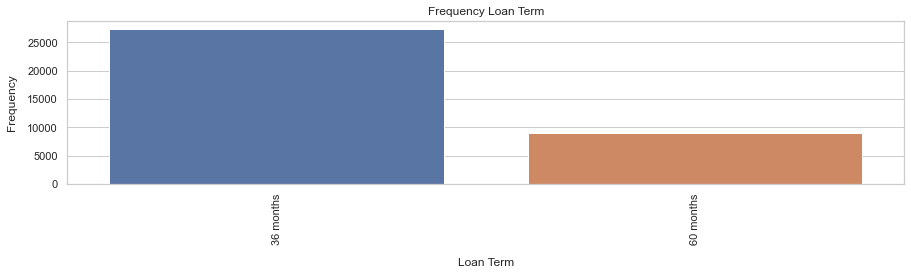

In [455]:
# Let's find No of Charged Off Loans by Term
plt.figure(figsize=(15, 3))
plt.title('Frequency Loan Term')
sns.countplot(x = 'term',  
              order = df.term.value_counts().sort_index().index, 
              data = df)
plt.xlabel('Loan Term', labelpad = 10)
plt.ylabel('Frequency', labelpad = 10)
plt.xticks(rotation = 90)

plt.show()

### <u> Analysis 1.6: </u>
<br>
<h6 style="color:blue"> 
    Initial analysis says that loans which are applied for 36 months have high chance to Charged Off.
</h6>
<br><br>

<br>

### 1.7 Univariate Analysis -  Loans by Grade

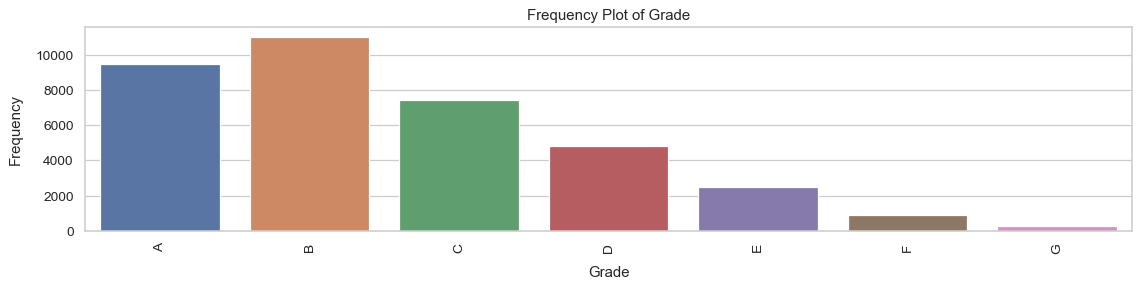

In [456]:
# Let's find No of Charged Off Loans by Grade
plt.figure(figsize=(15, 3), dpi=90)
plt.title('Frequency Plot of Grade')
sns.countplot(x = 'grade',  
              order = df.grade.value_counts().sort_index().index, 
              data = df)
plt.xlabel('Grade', labelpad = 10)
plt.ylabel('Frequency', labelpad = 10)
plt.xticks(rotation = 90)

plt.subplots_adjust(wspace = 10)
plt.show()

### <u> Analysis 1.7: </u>
<br>
<h6 style="color:blue"> 
    Initial analysis says that loans which are of Grade B and C, followed by D , have high chance to Charged Off.
</h6>
<br><br>

<br>

### 1.8 Univariate Analysis - Charged Off Loans by Sub_grade

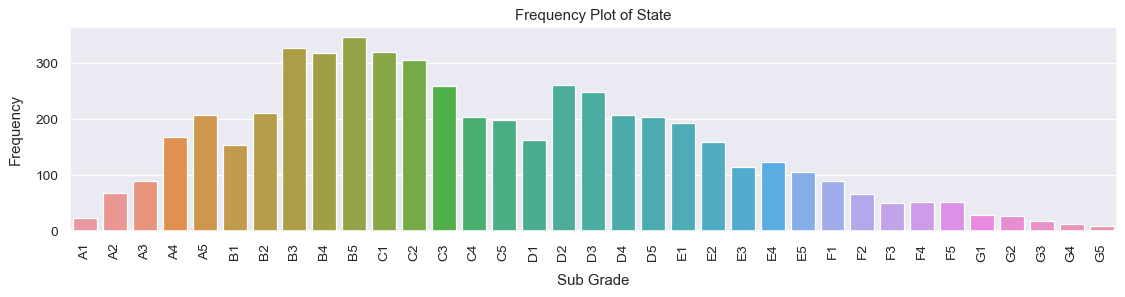

In [260]:
# Let's find No of Charged Off Loans by State
plt.figure(figsize=(15, 3), dpi=90)
plt.title('Frequency Plot of State')
sns.countplot(x = 'sub_grade',  
              order = Charged_Off_df.sub_grade.value_counts().sort_index().index, 
              data = Charged_Off_df)
plt.xlabel('Sub Grade', labelpad = 10)
plt.ylabel('Frequency', labelpad = 10)
plt.xticks(rotation = 90)

plt.subplots_adjust(wspace = 10)
plt.show()

### <u> Analysis 1.8: </u>
<br>
<h6 style="color:blue"> 
    Initial analysis says that loans which are of Sub Grade B3,B4,B5,C1 and C2 have high chance to Charged Off.
</h6>
<br><br>

<br>

### 1.9 Univariate Analysis - Charged Off Loans by Employment Length

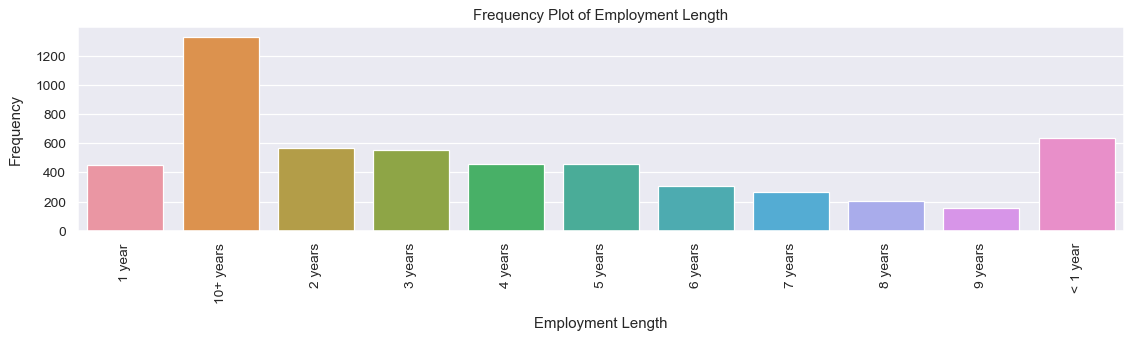

In [261]:
# Let's find No of Charged Off Loans by State
plt.figure(figsize=(15, 3), dpi=90)
plt.title('Frequency Plot of Employment Length')
sns.countplot(x = 'emp_length',  
              order = Charged_Off_df.emp_length.value_counts().sort_index().index, 
              data = Charged_Off_df)
plt.xlabel('Employment Length', labelpad = 10)
plt.ylabel('Frequency', labelpad = 10)
plt.xticks(rotation = 90)

plt.subplots_adjust(wspace = 10)
plt.show()

### <u> Analysis 1.9: </u>
<br>
<h6 style="color:blue"> 
    Initial analysis says that employees who are working for more than 10+ years are  having high chance to Charged Off. But this data also incude all peple who are having exp above 10+ i.e. 11, 12,13 etc. So this number is not certain. So we can't conclude anything on 10+ years but certainly we can say that people who are in inital phse of their employment they have chance to Charge off. 
</h6>
<br><br>

<br>

### 1.10 Univariate Analysis - Charged Off Loans by Month

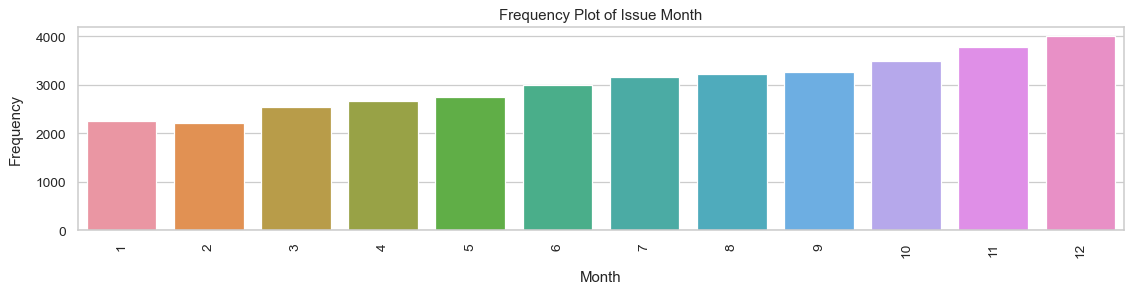

In [457]:
# Let's find No of Charged Off Loans by State
plt.figure(figsize=(15, 3), dpi=90)
plt.title('Frequency Plot of Issue Month')
sns.countplot(x = 'issue_month',  
              order = df.issue_month.value_counts().sort_index().index, 
              data = df)
plt.xlabel('Month', labelpad = 10)
plt.ylabel('Frequency', labelpad = 10)
plt.xticks(rotation = 90)

plt.subplots_adjust(wspace = 10)
plt.show()

### <u> Analysis 1.10: </u>
<br>
<h6 style="color:blue"> 
    Initial analysis says that loans which are given end months of the years, have high chance to Charged Off.
</h6>
<br><br>

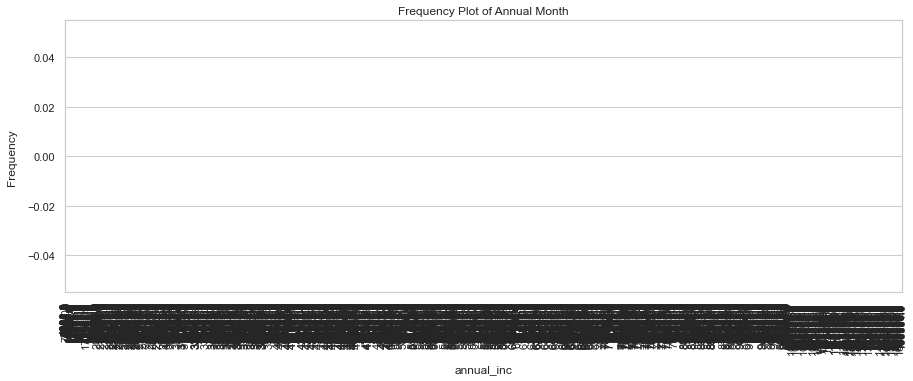

In [466]:
# Let's find No of Charged Off Loans by State
plt.figure(figsize=(15, 5))
plt.title('Frequency Plot of Annual Month')
sns.countplot(x = 'issue_month',  
              order = df.annual_inc.value_counts().sort_index().index, 
              data = df)
plt.xlabel('annual_inc', labelpad = 10)
plt.ylabel('Frequency', labelpad = 10)
plt.xticks(rotation = 90)

plt.subplots_adjust(wspace = 10)
plt.show()

<br><br><br><br>

<h1 align="center" style="color:Red"><u> Bivariate and Segmened analysis </u> </h1>
<br><br>

    1. home_ownership
    2. purpose
    3. addr_state
    4. term
    5. grade
    6. emp_length
    7. issue_yr
    8. funded_amnt
    9. int_rate_percent
    10. annual_inc
    11. issue_month
    



loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
quarter                                                      
Q4                  1734        9542  11276           15.3778
Q3                  1418        8237   9655           14.6867
Q2                  1224        7189   8413           14.5489
Q1                   891        6135   7026           12.6815


<AxesSubplot:xlabel='quarter', ylabel='Charged Off Rate'>

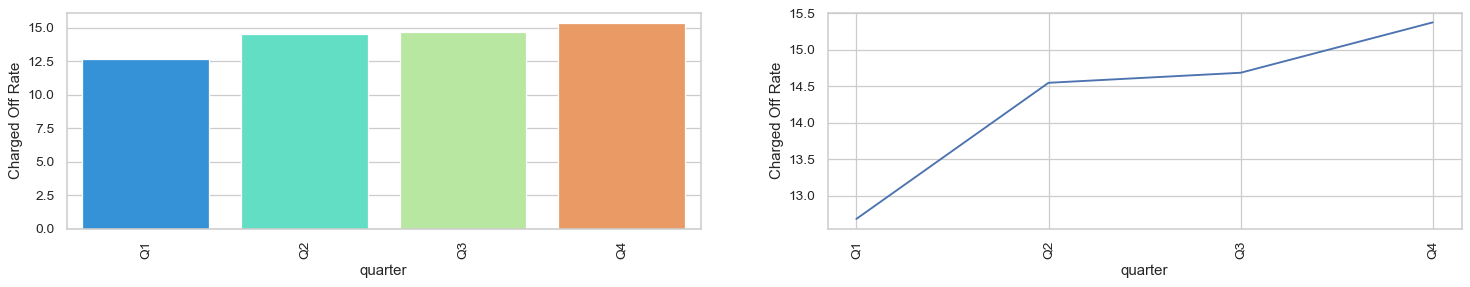

In [464]:
## 2.0 issue_month against Charged Off Percentage 

bins = [0,3,6,9,12]

rng = ['Q1','Q2','Q3','Q4']

df['quarter'] = pd.cut(df.issue_month, bins, labels = rng)

df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'quarter',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df1['Total'] = df1['Charged Off'] + df1['Fully Paid']

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.sort_values(by = 'Charged Off Rate', ascending = False))

xdata = df1.index
ydata = df1['Charged Off Rate']

plt.figure(figsize=(20, 7), dpi=90)
plt.subplot(2, 2, 1)
plt.xticks(rotation = 90)
sns.barplot(x = xdata, y = ydata, estimator = np.mean, palette = 'rainbow')
plt.subplot(2, 2, 2)
plt.xticks(rotation = 90)
sns.lineplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')

## 2.1 home_ownership against Charged Off Percentage Rate

loan_status     Charged Off  Fully Paid  Total  Charged Off Rate
home_ownership                                                  
OTHER                    18          78     96           18.7500
RENT                   2726       15321  18047           15.1050
OWN                     398        2367   2765           14.3942
MORTGAGE               2242       14344  16586           13.5174


<AxesSubplot:xlabel='home_ownership', ylabel='Charged Off Rate'>

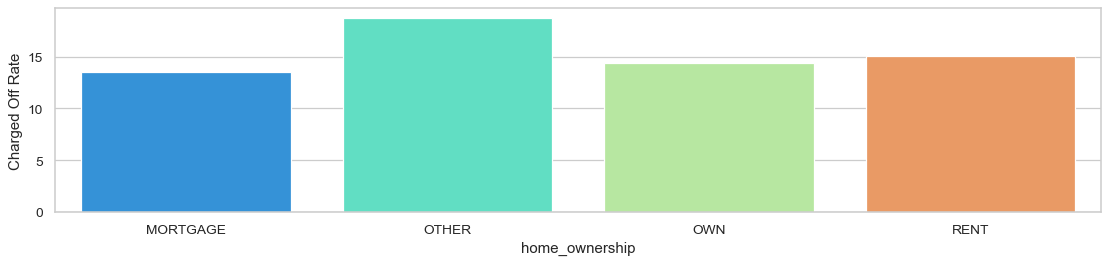

In [411]:
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'home_ownership',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))


xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15, 3), dpi=90)
sns.barplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')

<Figure size 576x216 with 0 Axes>

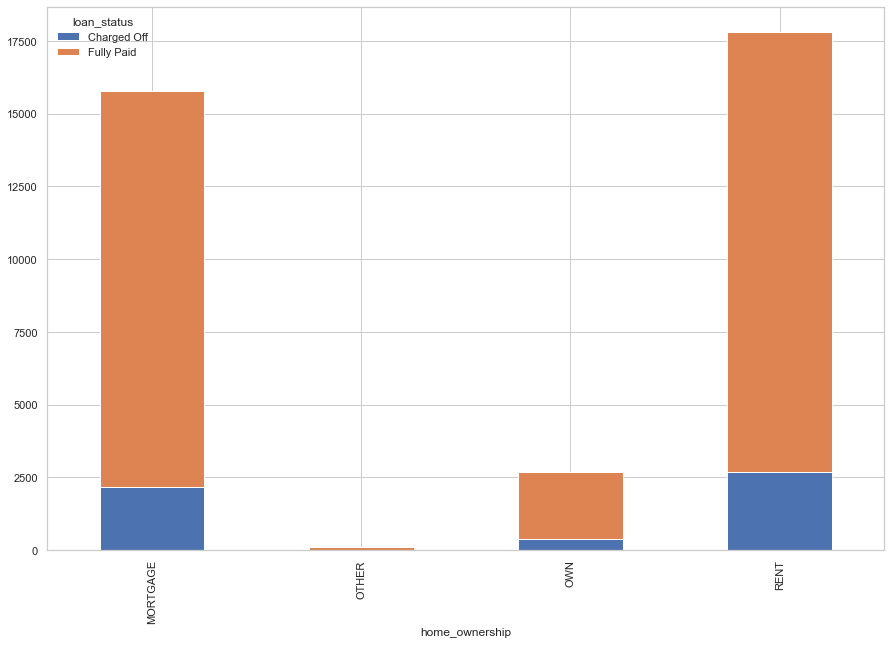

In [454]:
plt.figure(figsize=(8, 3))
df.groupby(['home_ownership','loan_status'])['home_ownership'].count().unstack().plot(kind='bar', stacked=True)
plt.show()

<br> <br>

### Analysis 2.1 
    * People who has RENT or MORTGAGE takes loan mostly 
    * People who stated 'OTHER' as their Home ownership tend to charge off more.

    

## 2.2 Loan Purpose against Charged Off Percentage Rate

loan_status         Charged Off  Fully Paid  Total  Charged Off Rate
purpose                                                             
small_business              462        1247   1709           27.0334
renewable_energy             18          76     94           19.1489
house                        59         295    354           16.6667
educational                  52         262    314           16.5605
other                       592        3106   3698           16.0087
medical                     100         554    654           15.2905
moving                       84         466    550           15.2727
debt_consolidation         2674       14989  17663           15.1390
vacation                     50         297    347           14.4092
home_improvement            328        2454   2782           11.7901
car                         154        1292   1446           10.6501
credit_card                 509        4388   4897           10.3941
major_purchase              210   

<AxesSubplot:xlabel='purpose', ylabel='Charged Off Rate'>

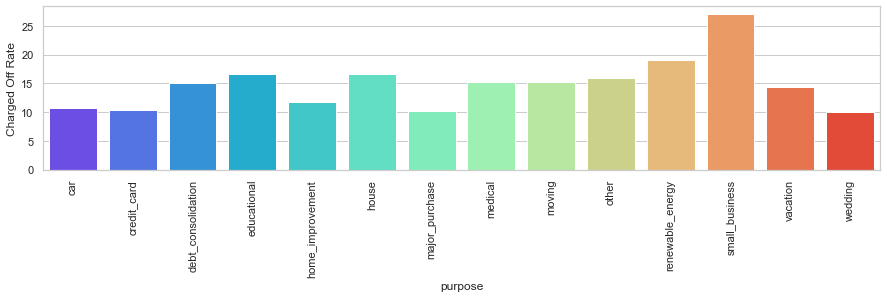

In [412]:

#  

df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'purpose',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15, 3))
plt.xticks(rotation = 90)
sns.barplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')

## Analysis 2.2

<br>
<h6 style="color:blue"> 
    Loan taken for below purpose have high charge off rate. 

    small_business                  27.0334
    renewable_energy                19.1489
    house                           16.67
<br><br>


    

<br>

## 2.3  addr_state against Charged Off Percentage Rate

loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
addr_state                                                   
NE                     3           2      5           60.0000
NV                    98         354    452           21.6814
SD                    11          49     60           18.3333
FL                   466        2147   2613           17.8339
AK                    13          60     73           17.8082
HI                    28         131    159           17.6101
ID                     1           5      6           16.6667
NM                    29         146    175           16.5714
MO                   104         532    636           16.3522
GA                   207        1081   1288           16.0714
OR                    67         350    417           16.0671
NJ                   271        1417   1688           16.0545
CA                  1048        5497   6545           16.0122
MD                   154         815    969           15.8927
UT      

<AxesSubplot:xlabel='addr_state', ylabel='Charged Off Rate'>

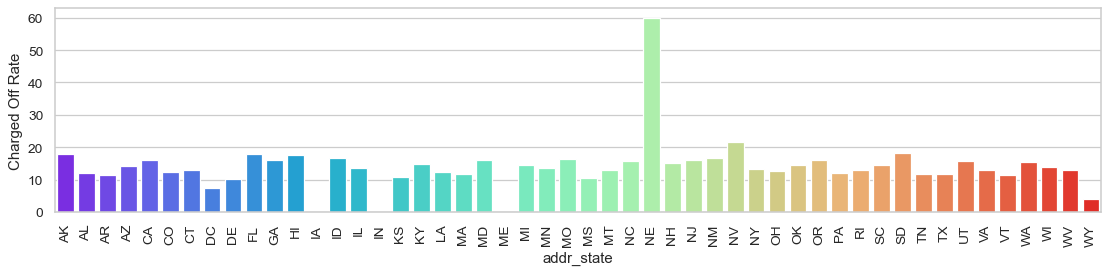

In [423]:

# 

df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'addr_state',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))


xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15, 3), dpi=90)
plt.xticks(rotation = 90)
sns.barplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')

## Analysis 2.3


<br>
<h6 style="color:blue"> 
    ##### Charged Off Rate - Top 3 Borrower's  State:

    1. NE        = 60.00%
    2. NV        = 21.68%
    3. SD        = 18.33%
    
<br><br>



## 2.4 term against Charged Off Percentage Rate

loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
term                                                         
 60 months          2267        6660   8927           25.3949
 36 months          3000       24443  27443           10.9317


<AxesSubplot:xlabel='term', ylabel='Charged Off Rate'>

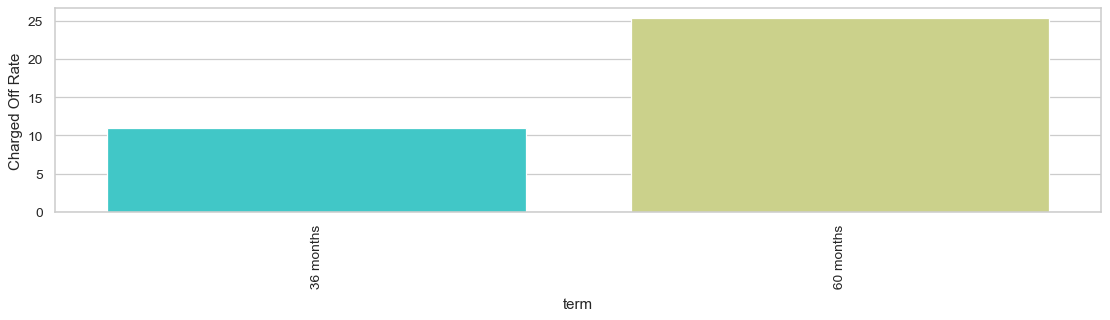

In [427]:


df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'term',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15, 3), dpi=90)
plt.xticks(rotation = 90)
sns.barplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')


### Analysis 2.4

<br>
<h6 style="color:blue"> 
   Charged Off Rate By Term:

    1. 60 months   = 22.70%
    
    Loans which are given for 60 months have 22.7% charged off rate.
    
<br><br>
 

## 2.5 grade against Charged Off Percentage Rate

loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
grade                                                        
G                     93         183    276           33.6957
F                    293         604    897           32.6644
E                    662        1817   2479           26.7043
D                   1065        3745   4810           22.1414
C                   1274        6165   7439           17.1260
B                   1326        9696  11022           12.0305
A                    554        8893   9447            5.8643


<AxesSubplot:xlabel='grade', ylabel='Charged Off Rate'>

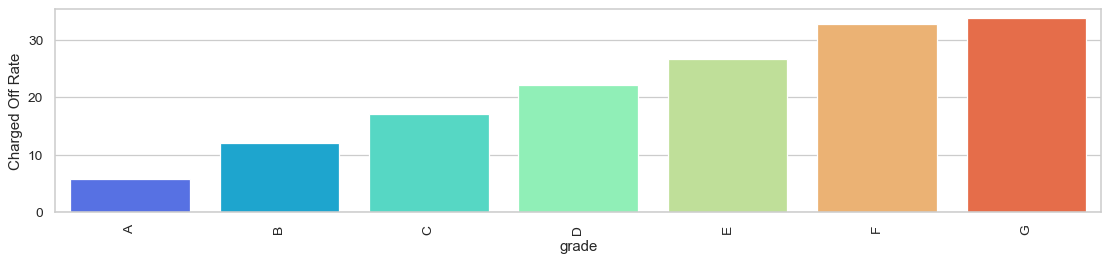

In [428]:
# Categorical Variable Analysis: 
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'grade',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))


xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15, 3), dpi=90)
plt.xticks(rotation = 90)
sns.barplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')

### Analysis 2.5
<br>
<h6 style="color:blue"> 
   F and G grade has high charged off rate which we already saw in univariate analysis, bivariate analysis also stats that as Grade increase charged Off Rate also increases.

<br><br>


## 2.6 emp_length against Charged Off Percentage Rate

loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
emp_length                                                   
10+ years           1330        7157   8487           15.6710
7 years              263        1445   1708           15.3981
5 years              457        2732   3189           14.3305
1 year               453        2710   3163           14.3218
< 1 year             635        3859   4494           14.1300
8 years              202        1231   1433           14.0963
6 years              305        1860   2165           14.0878
3 years              555        3453   4008           13.8473
4 years              460        2875   3335           13.7931
2 years              566        3720   4286           13.2058
9 years              158        1068   1226           12.8874


loan_status  Charged Off   Fully Paid        Total  Charged Off Rate
count          11.000000    11.000000    11.000000         11.000000
mean          489.454545  2919.090909  3408.545455    

<AxesSubplot:xlabel='emp_length', ylabel='Charged Off Rate'>

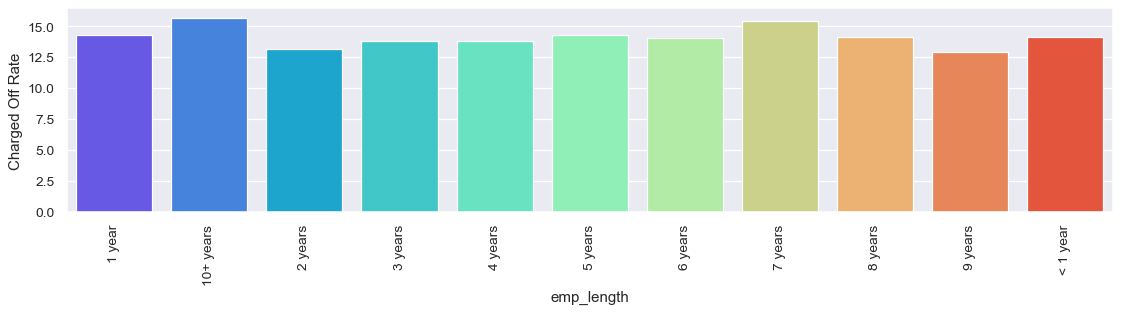

In [280]:
# Categorical Variable Analysis: 
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'emp_length',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))


xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15, 3), dpi=90)
plt.xticks(rotation = 90)
sns.barplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')

### Analysis 2.6
<br>
<h6 style="color:blue"> 
   we can say that people who are in initial phase of their employment they have chance to Charge off

<br><br>


## 2.7 issue_year against Charged Off Percentage Rate

loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
issue_year                                                   
2007                  42         193    235           17.8723
2011                3041       16134  19175           15.8592
2008                 238        1278   1516           15.6992
2010                1372        9516  10888           12.6010
2009                 574        3982   4556           12.5988


<AxesSubplot:xlabel='issue_year', ylabel='Charged Off Rate'>

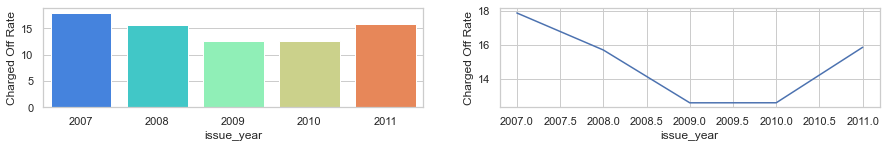

In [429]:
# Categorical Variable Analysis: 
df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'issue_year',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))


xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15, 4))
plt.xticks(rotation = 90)
plt.subplot(2, 2, 1)
sns.barplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')
plt.subplot(2, 2, 2)
sns.lineplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')

### Analysis 2.7
<br>
<h6 style="color:blue"> 
   Charged off rate is high for starting and redcued in subesequent year but increased in last year 2011.

<br><br>


## 2.8 funded_amnt against Charged Off Percentage Rate

loan_status   Charged Off  Fully Paid  Total  Charged Off Rate
funded_range                                                  
30000-35000           129         366    495           26.0606
20000-25000           452        1822   2274           19.8769
25000-30000           113         459    572           19.7552
15000-20000           738        3328   4066           18.1505
10000-15000          1041        6470   7511           13.8597
0-5000               1221        7793   9014           13.5456
5000-10000           1573       10865  12438           12.6467


<AxesSubplot:xlabel='funded_range', ylabel='Charged Off Rate'>

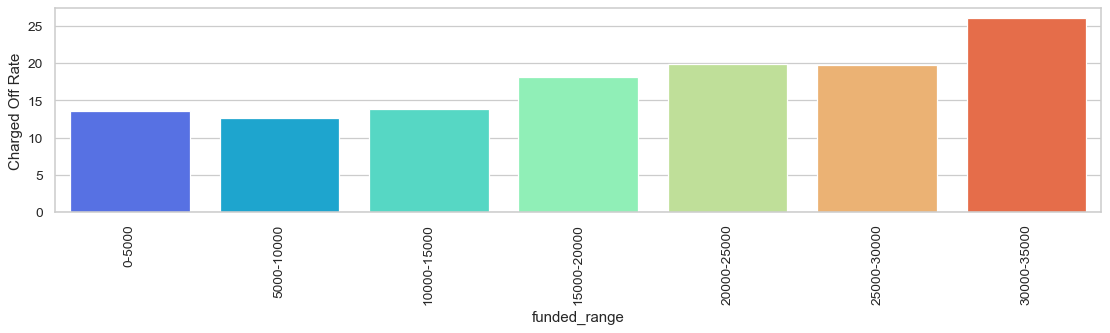

In [430]:
#  Categorical Variable Analysis: 

bins = [0, 5000,10000, 15000,20000, 25000,30000, 35000]

fund_rang = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000','30000-35000']

df['funded_range'] = pd.cut(df.funded_amnt, bins, labels = fund_rang)


df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'funded_range',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))

xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']
plt.figure(figsize=(15, 3), dpi=90)
plt.xticks(rotation = 90)
sns.barplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')

### Analysis 2.8
<br>
<h6 style="color:blue"> 
   As loan amount increases , charged off percentage also increases. 

<br><br>


## 2.9 int_rate against Charged Off Percentage Rate

loan_status             Charged Off  Fully Paid  Total  Charged Off Rate
int_rate_percent_range                                                  
20-25                           270         427    697           38.7374
15-20                          1685        5088   6773           24.8782
10-15                          2562       14780  17342           14.7734
5-10                            750       10808  11558            6.4890


<AxesSubplot:xlabel='int_rate_percent_range', ylabel='Charged Off Rate'>

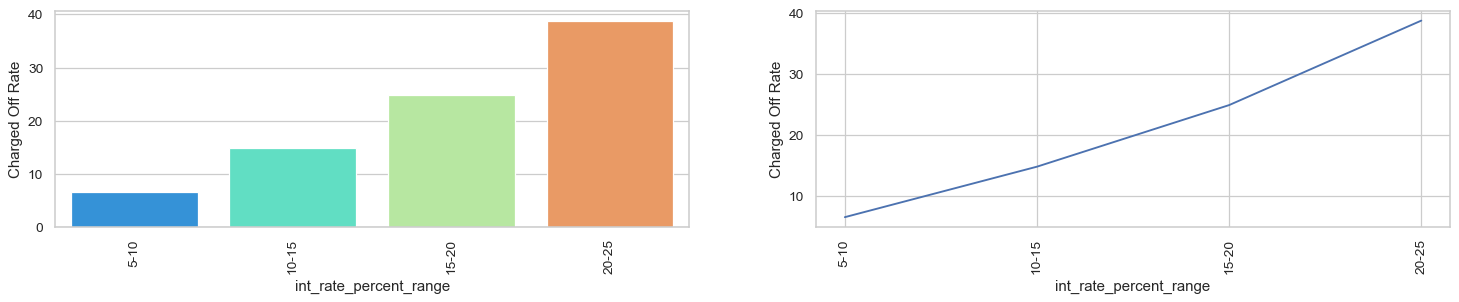

In [432]:
# Categorical Variable Analysis: 

bins = [5, 10, 15, 20, 25]

interest_range = ['5-10', '10-15', '15-20', '20-25']

df['int_rate_percent_range'] = pd.cut(df.int_rate, bins, labels = interest_range)


df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'int_rate_percent_range',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0,
                      margins = True,
                      margins_name = 'Total')

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.iloc[0:-1].sort_values(by = 'Charged Off Rate', ascending = False))


xdata = df1.iloc[0:-1].index
ydata = df1.iloc[0:-1]['Charged Off Rate']

plt.figure(figsize=(20, 7), dpi=90)
plt.subplot(2, 2, 1)
plt.xticks(rotation = 90)
sns.barplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')
plt.subplot(2, 2, 2)
plt.xticks(rotation = 90)
sns.lineplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')

### Analysis 2.9
<br>
<h6 style="color:blue"> 
   This clearly sates that if rate of iterest increases there are high chance of getting Charged Off. 

<br><br>




## 2.10 annual_inc against Charged Off Percentage Rate

loan_status     Charged Off  Fully Paid  Total  Charged Off Rate
annual_inc_rng                                                  
0-20000                 187         809    996           18.7751
20000-40000            1415        6696   8111           17.4454
40000-60000            1671        9320  10991           15.2033
60000-80000            1001        6502   7503           13.3413
140000-160000            84         621    705           11.9149
80000-100000            521        3943   4464           11.6711
120000-140000           137        1074   1211           11.3130
100000-120000           244        2060   2304           10.5903
160000-180000             7          78     85            8.2353


<AxesSubplot:xlabel='annual_inc_rng', ylabel='Charged Off Rate'>

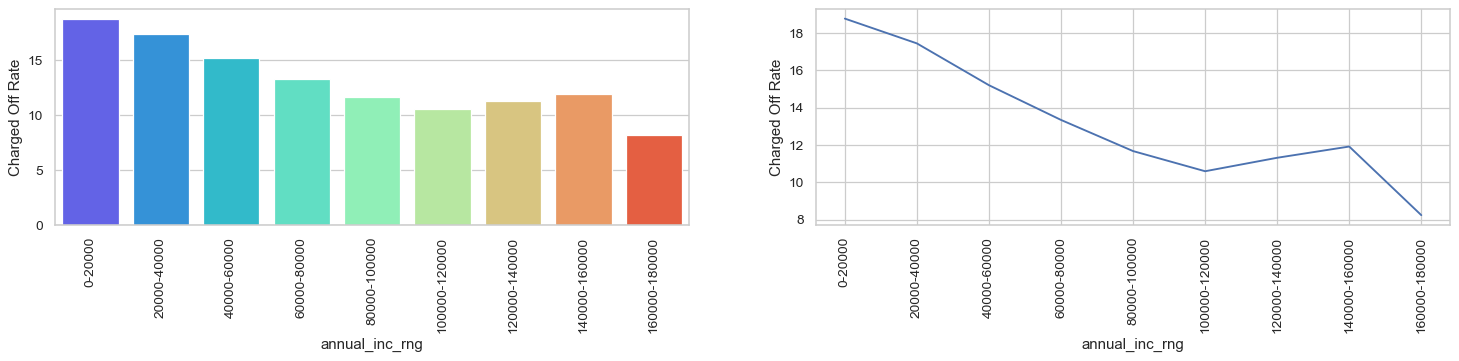

In [437]:
#Categorical Variable Analysis: 

bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000]

rng = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000',
       '120000-140000', '140000-160000', '160000-180000']

df['annual_inc_rng'] = pd.cut(df.annual_inc, bins, labels = rng)

df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'annual_inc_rng',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df1['Total'] = df1['Charged Off'] + df1['Fully Paid']

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.sort_values(by = 'Charged Off Rate', ascending = False))

xdata = df1.index
ydata = df1['Charged Off Rate']

plt.figure(figsize=(20, 7), dpi=90)
plt.subplot(2, 2, 1)
plt.xticks(rotation = 90)
sns.barplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')
plt.subplot(2, 2, 2)
plt.xticks(rotation = 90)
sns.lineplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')


# Analysis 2.10

<br>
<h6 style="color:blue"> 
   Top 3 Charged Off Annual Range
    
    0-20000                18.7751
    20000-40000            17.4454
    40000-60000            15.2033

<br><br>

   

loan_status  Charged Off  Fully Paid  Total  Charged Off Rate
quarter                                                      
Q4                  1734        9542  11276           15.3778
Q3                  1418        8237   9655           14.6867
Q2                  1224        7189   8413           14.5489
Q1                   891        6135   7026           12.6815


<AxesSubplot:xlabel='quarter', ylabel='Charged Off Rate'>

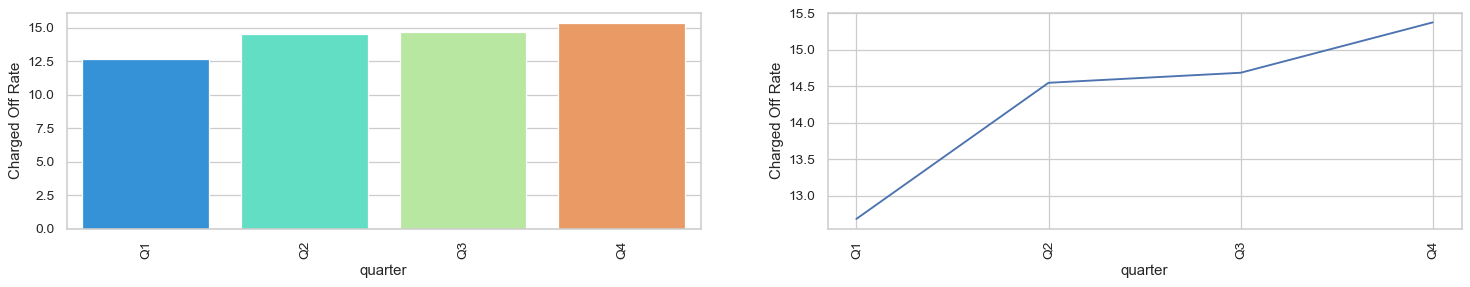

In [463]:
bins = [0,3,6,9,12]

rng = ['Q1','Q2','Q3','Q4']

df['quarter'] = pd.cut(df.issue_month, bins, labels = rng)

df1 = df.pivot_table(values = 'funded_amnt',
                      index = 'quarter',
                      columns = 'loan_status',
                      aggfunc = np.count_nonzero,
                      fill_value = 0)

df1['Total'] = df1['Charged Off'] + df1['Fully Paid']

df1['Charged Off Rate'] = 100*(round((df1['Charged Off']/df1['Total']), 6))

print(df1.sort_values(by = 'Charged Off Rate', ascending = False))

xdata = df1.index
ydata = df1['Charged Off Rate']

plt.figure(figsize=(20, 7), dpi=90)
plt.subplot(2, 2, 1)
plt.xticks(rotation = 90)
sns.barplot(x = xdata, y = ydata, estimator = np.mean, palette = 'rainbow')
plt.subplot(2, 2, 2)
plt.xticks(rotation = 90)
sns.lineplot(x = xdata, y = ydata, estimator = np.median, palette = 'rainbow')

#        Bivariate Analysis: Continuous Variables

In [439]:
# Find correlation
charged_off_df = df[df.loan_status == 'Charged Off'].corr()
charged_off_df

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,open_acc,revol_util,total_acc,issue_year,issue_month
loan_amnt,1.000000,0.979061,0.340290,0.924235,0.446837,0.174390,0.038086,0.272592,0.124622,0.070854
funded_amnt,0.979061,1.000000,0.344096,0.952814,0.439798,0.171124,0.042853,0.263152,0.136340,0.070040
int_rate,0.340290,0.344096,1.000000,0.316547,0.154016,0.032122,0.375272,-0.021490,0.189403,0.082666
installment,0.924235,0.952814,0.316547,1.000000,0.444447,0.167336,0.070879,0.237271,0.032203,0.053106
annual_inc,0.446837,0.439798,0.154016,0.444447,1.000000,0.287880,0.092666,0.382472,0.012498,0.019473
open_acc,0.174390,0.171124,0.032122,0.167336,0.287880,1.000000,-0.060410,0.684329,0.000496,0.011142
revol_util,0.038086,0.042853,0.375272,0.070879,0.092666,-0.060410,1.000000,-0.026602,0.085443,0.052791
total_acc,0.272592,0.263152,-0.021490,0.237271,0.382472,0.684329,-0.026602,1.000000,0.030992,0.009261
issue_year,0.124622,0.136340,0.189403,0.032203,0.012498,0.000496,0.085443,0.030992,1.000000,-0.000868
issue_month,0.070854,0.070040,0.082666,0.053106,0.019473,0.011142,0.052791,0.009261,-0.000868,1.000000


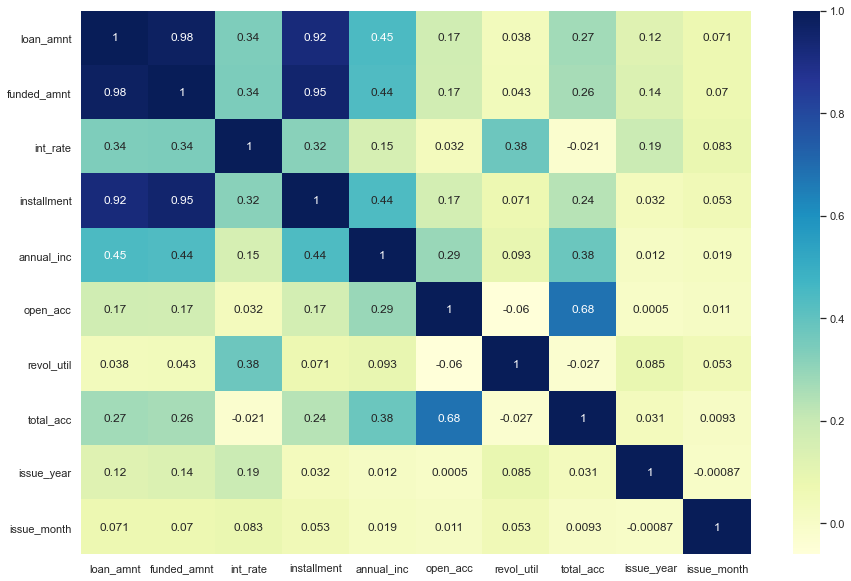

In [440]:
sns.heatmap(charged_off_df, 
            xticklabels=charged_off_df.columns.values,
            yticklabels=charged_off_df.columns.values,cmap="YlGnBu",annot= True)
plt.show()

# Analysis 

Analysis  -

1. 14.35% loans are getting charged Off.
2. People who are living on rent or have mortgage apply for loan mostly, but people who have mentioned OITHER in their property section is risky as they are most like to get defaulted.
3. Loans where source are verified have less chance to be charged off. Maximum loans were provided without verification
4. Most of the loan is given for debt_consolidation purpose and loan given for small_business (27.0334%) and renewable_energy (19.1489) purpose is a risk of getting defaulted. 
5.  Most people opted for 36 months as their loan term and whereas people who have opted for 60 months have hight percentage of getting defaulted (22.70%)
6. Most of the loans are given to “CA” state where as Loan given to “NE” state is risky as 60% time loans are getting defaulted.  (NE = 60.00%, NV = 21.68%, SD = 18.33%)
7. Loan grade A and B are mostly given to customers and looks safe whereas applicants who apply for  Loan Grade G, F and E are seems to be risky as they have high rate of charged off 33.7% , 32.6% and 26.7% respectively. 
8. Employees who are working for more than 10+ years are having high chance to Charged Off. But this data also include all people who are having work experience  above 10+ i.e. 11, 12,13 etc. So this number is not certain. So we can't conclude anything on 10+ years but certainly we can say that people who are in initial phase of their employment they have chance to Charge off.
9. It is observed that maximum times of  loans  given are in end months of the years (oct, nov and dec ) and  , have high  rate of Charged Off. 
10. As loan amount increases , charged off percentage also increases.
11. if rate of interest increases there are high chance of getting Charged Off.
12. People whose income is less than 60K , are having high rate of getting defaulted.
